## Loading our Dataset

In [ ]:
# Code to read csv file into Colaboratory:
# !pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd

In [ ]:
# link for dataset
link = 'https://drive.google.com/file/d/1Id58j2rV5Ec_ZbqpgQ1HE-Tcq78-hYPc/view?usp=share_link' # The shareable link

# getting the id part of the link
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset.csv') 
 
data = pd.read_csv('dataset.csv')

# dropping unnecessary columns
data.drop(["Unnamed: 0", "fex_c_2011", 'DIRECTORIO','SECUENCIA_P'], axis = 1, inplace = True)

In [ ]:
data

,P388,P6440,P6790,P6870,P6880,P6915,P6990,P9450,P7020,P7040,...,P7480S11,ORDEN,HOGAR,REGIS,P7495,P7505,MES,DPTO,base,CLASE
0,5.0,1.0,10.0,2.0,9.0,2.0,2.0,2.0,1.0,2.0,...,2,2,1,95,2,1,1,5,Area,1
1,5.0,1.0,3.0,5.0,7.0,1.0,2.0,2.0,2.0,2.0,...,2,3,1,95,2,2,1,5,Area,1
2,5.0,1.0,12.0,4.0,7.0,3.0,2.0,2.0,2.0,2.0,...,2,1,1,95,2,1,1,5,Area,1
3,5.0,1.0,12.0,2.0,6.0,2.0,2.0,2.0,1.0,2.0,...,2,1,1,95,2,2,1,5,Area,1
4,5.0,1.0,11.0,9.0,7.0,1.0,1.0,1.0,1.0,2.0,...,2,3,1,95,2,1,1,5,Area,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504068,18.0,2.0,12.0,2.0,8.0,2.0,2.0,2.0,1.0,2.0,...,2,5,1,95,2,1,12,18,Resto,2
504069,18.0,2.0,12.0,1.0,8.0,2.0,2.0,2.0,1.0,2.0,...,2,1,1,95,2,2,12,18,Resto,2
504070,18.0,1.0,12.0,2.0,8.0,2.0,2.0,2.0,1.0,2.0,...,2,1,1,95,2,2,12,18,Resto,2
504071,18.0,1.0,12.0,9.0,6.0,1.0,1.0,1.0,1.0,2.0,...,2,1,1,95,2,2,12,18,Resto,2


## Data Cleaning

In [ ]:
# Getting rid of variables that are too closely related to our dependant variable
data.drop(["P9450", "P6090", "RAMA2D", "P7170S5", "P7180", "OCI", "P6430", "RAMA4D", "code", "P6016", "P6081", "P6083", "P6230", "ORDEN", "HOGAR", "REGIS", "P6210S1", "P7495"], axis = 1, inplace = True)

In [ ]:
# Transforming all variables to string
datos = data.astype(str)

In [ ]:
# Change variable type                
datos = datos.astype({"P6790": float})

In [ ]:
# types of variables
datos.dtypes

P388         object
P6440        object
P6790       float64
P6870        object
P6880        object
P6915        object
P6990        object
P7020        object
P7040        object
P1881        object
P7090        object
P7130        object
P7170S1      object
P7170S6      object
P514         object
P515         object
P7240        object
P6020        object
P6050        object
P6070        object
P6125        object
P6160        object
P6170        object
P6210        object
P6240        object
P7480S1      object
P7480S3      object
P7480S4      object
P7480S5      object
P7480S6      object
P7480S7      object
P7480S8      object
P7480S9      object
P7480S10     object
P7480S11     object
P7505        object
MES          object
DPTO         object
base         object
CLASE        object
dtype: object

In [ ]:
# settig up the y variable
datos['P6440'] = datos['P6440'].replace("2","0",regex = True)

# switching the values of base, from strings to numeric categories
datos['base'] = datos['base'].replace("Area", 1, regex = True)
datos['base'] = datos['base'].replace("Cabecera", 2, regex = True)
datos['base'] = datos['base'].replace("Resto", 3, regex = True)

# Quick descriptions

In [ ]:
# defining a new dataframe for safe keeping
df_4 = datos

# Replace all 2 for 0
df_5 = datos["P6440"]

a = [round((len(df_5[df_5 == "0.0"])/len(df_5))*100, 2), round((len(df_5[df_5 == "1.0"])/len(df_5))*100, 2)]
b = ["Contract", "No Contract"]

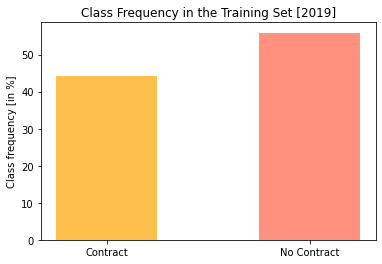

In [ ]:
# Loading plt
import matplotlib.pyplot as plt

# Plotting the bar
plt.bar(b, a, color =["orange", 'tomato'], width = 0.5, alpha = 0.7)

# Labelling the Plot
plt.ylabel("Class frequency [in %]")
plt.title("Class Frequency in the Training Set [2019]");

In [ ]:
# Defining dependant variable
y = datos['P6440']

# setting the rest of the database
X = datos.drop(['P6440'],axis=1)

# Models


In [ ]:
categorical = ['P388', 'P6790', 'P6870', 'P6880', 'P6915', 'P6990',
       'P7020', 'P7040', 'P1881', 'P7090', 'P7130', 'P7170S1', 'P7170S6',
       'P514', 'P515', 'P7240', 'P6020', 'P6050', 
       'P6125', 'P6160', 'P6170', 'P6210', 'P6240', 'P7480S1',
       'P7480S3', 'P7480S4', 'P7480S5', 'P7480S6', 'P7480S7', 'P7480S8',
       'P7480S9', 'P7480S10', 'P7480S11', 'P7505', 'MES', 'DPTO', 'base',
       'CLASE']

numerical = ["P6790"]

In [ ]:
# All packages 

# Line to split the code
from sklearn.model_selection import train_test_split

# Lines for OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# Lines for Standardscaler
from sklearn.preprocessing import StandardScaler

# Line for Logistic Regression
from sklearn.linear_model import LogisticRegression

# Line for F1 Score
from sklearn.metrics import f1_score

# Line for Matthews Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

# Line for cross validation
from sklearn.model_selection import cross_validate

#Line for confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Line for Decision Tree 
from sklearn.tree import DecisionTreeClassifier

# Line for XGBoost
import xgboost as xgb

### Logistic Regression

In [ ]:
# Setting up the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=537)

In [ ]:
# We use onehotencoder to encode our categorical varibales into binary columns
ohe = OneHotEncoder( handle_unknown='ignore')
se = StandardScaler()

# Preprocess 
preprocessor = ColumnTransformer(
    transformers = [
        ("num",StandardScaler(),numerical),
        ("cat",ohe,categorical),
    ]
)

In [ ]:
# Create a pipeline
pipe_log = Pipeline([
    ('preproc', preprocessor),
    ('model', LogisticRegression(max_iter= 1000,
                                 solver = 'lbfgs'))
    ])

# Fit
y_pred_log = pipe_log.fit(X_train, y_train).predict(X_train)

In [ ]:
# Using our log model to predict the testing set
y_pred_log = pipe_log.fit(X_train, y_train).predict(X_test)

In [ ]:
# Calculating the F1 Score
f1_log = f1_score(y_pred_log, y_test, average="macro")
f1_log

0.908985427332799

In [ ]:
# Calculating the MCC
mcc_log = matthews_corrcoef(y_pred_log, y_test)
mcc_log

0.8183169733547246

### Decision Trees

In [ ]:
# Setting up the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=573)

In [ ]:
# We use onehotencoder to encode our categorical varibales into binary columns
ohe = OneHotEncoder(handle_unknown='ignore')
se = StandardScaler()

# Preprocess 
preprocessor = ColumnTransformer(
    transformers = [
        ("num",StandardScaler(),numerical),
        ("cat",ohe,categorical),
    ]
)

In [ ]:
# Create a pipeline
pipe_tree = Pipeline([
    ('preproc', preprocessor),
    ('model', DecisionTreeClassifier())
    ])

# # Fit
y_pred_tree = pipe_tree.fit(X_train, y_train).predict(X_train)

In [ ]:
# Using our tree model to predict the testing set
y_pred_tree = pipe_tree.fit(X_train, y_train).predict(X_test)

In [ ]:
# Calculating the F1 Score
f1_tree = f1_score(y_pred_tree, y_test, average="macro") 
f1_tree

0.9432111564849217

In [ ]:
# Calculating the MCC
mcc_tree = matthews_corrcoef(y_pred_tree, y_test) 
mcc_tree

0.8864267135748317

### XGBoost

In [ ]:
# Setting up the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=573)

In [ ]:
# We use onehotencoder to encode our categorical varibales into binary columns
ohe = OneHotEncoder(handle_unknown='ignore')
se = StandardScaler()

# Preprocess 
preprocessor = ColumnTransformer(
    transformers = [
        ("num",StandardScaler(),numerical),
        ("cat",ohe,categorical),
    ]
)

In [ ]:
# Create a pipeline
pipe_xg = Pipeline([
    ('preproc', preprocessor),
    ('model', xgb.XGBClassifier())
    ])

In [ ]:
# Using our xg model to predict the testing set
y_pred_xg = pipe_xg.fit(X_train, y_train).predict(X_test)

In [ ]:
# Calculating the F1 Score
f1_xg = f1_score(y_pred_xg, y_test, average="macro")
f1_xg

0.9055652012005869

In [ ]:
# Calculating the MCC
mcc_xg = matthews_corrcoef(y_pred_xg, y_test)
mcc_xg

0.8111381460566881

### Confusion Matrix

AttributeError: ignored

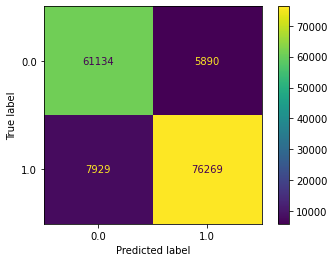

In [ ]:
# Logistic Regression Confusion Matrix
datos_confmat = ConfusionMatrixDisplay.from_estimator(pipe_log, X_test, y_test)

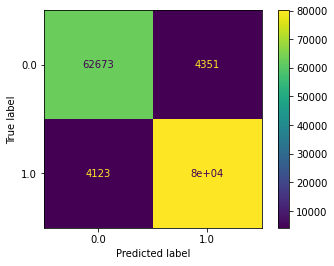

In [ ]:
# Decision Tree Classifier Confusion Matrix
datos_confmat = ConfusionMatrixDisplay.from_estimator(pipe_tree, X_test, y_test)

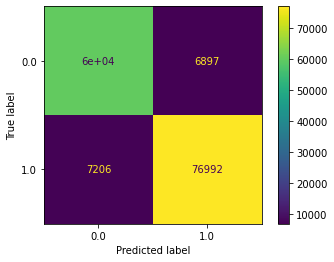

In [ ]:
# XGB Classifier Confusion Matrix
datos_confmat = ConfusionMatrixDisplay.from_estimator(pipe_xg, X_test, y_test)

## Test Score Graphics

In [ ]:
# Specifying the sets of Evaluation Metrics
c = [f1_log, mcc_log]
f =[f1_tree, mcc_tree]
g = [f1_xg, mcc_xg]

# Types of Models
d = ["Logistic Regression", "Decision Tree Classifier", "XGB Classifier"]

# Specifying the labels
e = ["F1 Score ", "MCC "]
h = [" F1 Score ", " MCC "]
i = [" F1 Score", " MCC"]

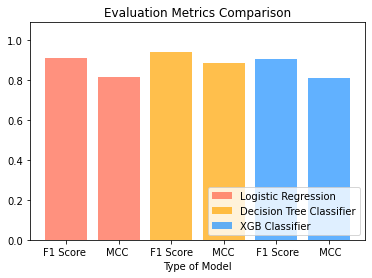

In [ ]:
# Defining the Color 
cols=["tomato", "tomato", "orange", "orange", "dodgerblue", "dodgerblue"]

# Plotting the bars
plt.bar(e, c, color = cols, alpha = 0.7, label = "a")
plt.bar(h, f, color = cols[2:4], alpha = 0.7, label = "a")
plt.bar(i, g, color = cols[4:6], alpha = 0.7, label = "a")

# Establishing the scope of our graph
plt.ylim(0, 1.09)

# Generating the Labels for the plot
plt.legend(["Logistic Regression", "Decision Tree Classifier", "XGB Classifier"], loc = 4)
plt.xlabel("Type of Model")
plt.title("Evaluation Metrics Comparison");